In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from statistics import mean 
import json
from sklearn.model_selection import train_test_split
from matplotlib.patches import Patch


# EXPERT_PATH = ['Avigail_expert_session.h5', 'Itai_expert_session.h5', 'Lali_expert_session.h5', 'elad_demo_session.h5']
EXPERT_PATH = ['Avigail_expert_session.h5', 'Itai_expert_session.h5', 'Lali_expert_session.h5', 'elad_demo_session.h5', "Arbelle_expert_session.h5", "Danielle_expert_session.h5"]


In [86]:
#data_1 = pd.read_hdf('Avigail_expert_session.h5')

In [87]:
#data_1[["error_before_right_timing", "error_after_right_timing"]]

In [88]:
combined_df = pd.DataFrame()  # Create an empty DataFrame to store the combined data

for path in EXPERT_PATH:
    try:
        data = pd.read_hdf(path)
        combined_df = pd.concat([combined_df, data])  # Concatenate the current file's data to the combined DataFrame
    except FileNotFoundError:
        print('File {} not found'.format(path))


expert_data =combined_df
type(expert_data)

pandas.core.frame.DataFrame

In [89]:
print ([i for i in combined_df["bpm"] if i!= 85])

[75.0, 76.0, 76.0, 76.0, 76.0, 76.0, 76.0, 72.0, 72.0, 72.0, 72.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 72.0, 72.0, 72.0, 72.0, 72.0]


In [90]:
expert_data.columns

Index(['midi_filename', 'username', 'practice_mode', 'bpm',
       'error_before_left_timing', 'error_before_right_timing',
       'error_before_left_pitch', 'error_before_right_pitch',
       'error_after_left_timing', 'error_after_right_timing',
       'error_after_left_pitch', 'error_after_right_pitch'],
      dtype='object')

In [91]:
#expert_data[["midi_filename","username", "error_before_right_timing", "error_after_right_timing" ]]
#expert_data[["username"]]

In [92]:
# pandas settings are local to with statement.
#with pd.option_context('display.max_rows', None,
#                       'display.max_columns', None,
#                       'display.precision', 3,
#                       ):
#    print(expert_data)


In [93]:
#fix me- verify wich data is picked up for test set

# Sort the data by 'midi_filename' and 'username' columns
expert_data = expert_data.sort_values(by=['midi_filename', 'username'])

# Group the data by 'midi_filename' and 'username'
grouped_data = expert_data.groupby(['midi_filename', 'username'])


train_data = pd.DataFrame()
test_data = pd.DataFrame()

# Iterate over each group
for group_key, group_df in grouped_data:
    # Check the number of points in the group
    group_size = len(group_df)

    if group_size > 1:
        np.random.seed(42)
# Perform the train-test split with shuffle=False
        train_group, test_group = train_test_split(group_df, test_size=1, shuffle=True)
       

        # Append train group to train data
        train_data = pd.concat([train_data, train_group])

        # Append test group to test data
        test_data = pd.concat([test_data, test_group])
    else:
        # Add the whole group to the training data
        train_data = pd.concat([train_data, group_df])

# Randomly choose a third of the points in test and move them to train
test_size = len(test_data)
train_size = len(train_data)
print (train_size, test_size)
# num_points_to_move = test_size // 3

# if num_points_to_move > 0:
#     random_indices = test_data.sample(n=num_points_to_move).index
#     train_data = pd.concat([train_data, test_data.loc[random_indices]])
#     test_data = test_data.drop(random_indices)

# Reset the index of train and test data
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

whole_data = expert_data.copy()
# Asya -comment out 
expert_data = whole_data #train_data




96 25


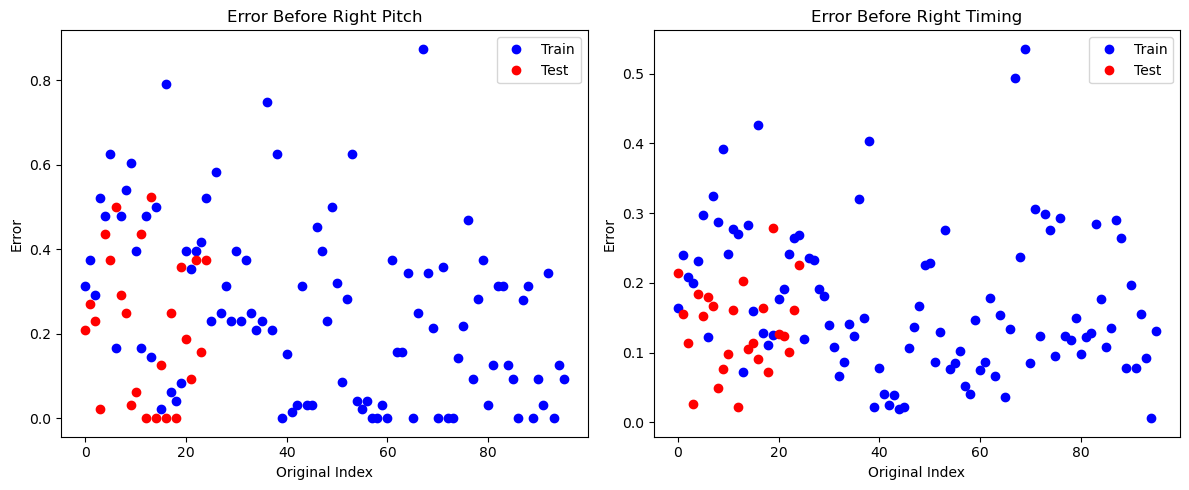

In [94]:
# Plot 'error_before_right_pitch' for train and test data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Error Before Right Pitch')
plt.plot(train_data.index, train_data['error_before_right_pitch'], 'bo', label='Train')
plt.plot(test_data.index, test_data['error_before_right_pitch'], 'ro', label='Test')

# Add labels and legends for the first plot
plt.xlabel('Original Index')
plt.ylabel('Error')
plt.legend()

# Plot 'error_before_right_timing' for train and test data
plt.subplot(1, 2, 2)
plt.title('Error Before Right Timing')
plt.plot(train_data.index, train_data['error_before_right_timing'], 'bo', label='Train')
plt.plot(test_data.index, test_data['error_before_right_timing'], 'ro', label='Test')

# Add labels and legends for the second plot
plt.xlabel('Original Index')
plt.ylabel('Error')
plt.legend()

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

In [95]:
# expert_data.head()
expert_data

,midi_filename,username,practice_mode,bpm,error_before_left_timing,error_before_right_timing,error_before_left_pitch,error_before_right_pitch,error_after_left_timing,error_after_right_timing,error_after_left_pitch,error_after_right_pitch
4,74a_HaKovaSheli.midi,a_2,IMP_PITCH,85.0,0.0,0.240111,0.0,0.375000,0.0,0.214765,0.0,0.208333
5,74a_HaKovaSheli.midi,a_2,IMP_PITCH,85.0,0.0,0.214765,0.0,0.208333,0.0,0.200346,0.0,0.520833
6,74a_HaKovaSheli.midi,a_2,IMP_PITCH,85.0,0.0,0.200346,0.0,0.520833,0.0,0.297872,0.0,0.625000
7,74a_HaKovaSheli.midi,a_2,IMP_PITCH,85.0,0.0,0.297872,0.0,0.625000,0.0,0.230774,0.0,0.479167
8,74a_HaKovaSheli.midi,a_2,IMP_PITCH,85.0,0.0,0.230774,0.0,0.479167,0.0,0.163820,0.0,0.312500
...,...,...,...,...,...,...,...,...,...,...,...,...
5,song9.midi,danielle_1,IMP_TIMING,85.0,0.0,0.078363,0.0,0.000000,0.0,0.092157,0.0,0.000000
6,song9.midi,danielle_1,IMP_TIMING,85.0,0.0,0.092157,0.0,0.000000,0.0,0.022047,0.0,0.000000
2,song9.midi,t_1,IMP_TIMING,85.0,0.0,0.226084,0.0,0.375000,0.0,0.005800,0.0,0.125000
3,song9.midi,t_1,IMP_PITCH,85.0,0.0,0.005800,0.0,0.125000,0.0,0.131552,0.0,0.093750


In [96]:
import enum
import random
import numpy as np

import GPy
import GPyOpt
from GPyOpt.methods import BayesianOptimization


class PracticeMode(enum.Enum):
    """
    All possible practice modes
    """
    IMP_PITCH = 0
    IMP_TIMING = 1
    LEFT = 2
    RIGHT = 3


# interval of possible bpm_values
BPM_BOUNDS = [50, 200]
class GaussianProcess:
    def __init__(self, bpm_norm_fac=100):
        self.data_X = None
        self.data_X_old_shape = None

        self.data_Y = None

        self.bpm_norm_fac = bpm_norm_fac

        self.domain = [
            {'name': 'practice_mode', 'type': 'categorical', 'domain': (0, 1, 2, 3)},
            {'name': 'bpm', 'type': 'continuous', 'domain':
                (self._norm_bpm(BPM_BOUNDS[0]), self._norm_bpm(BPM_BOUNDS[1]))},
            #{'name': 'error_pitch_left', 'type': 'continuous', 'domain': (0, 1)},
            {'name': 'error_pitch_right', 'type': 'continuous', 'domain': (0, 1)},
            #{'name': 'error_timing_left', 'type': 'continuous', 'domain': (0, 1)},
            {'name': 'error_timing_right', 'type': 'continuous', 'domain': (0, 1)}
        ]

        self.space = GPyOpt.core.task.space.Design_space(self.domain)
        self.kernel = None

    def _norm_bpm(self, v: float) -> float:
        
        return v / self.bpm_norm_fac

    def _params2domain(self, error, bpm: int, practice_mode: PracticeMode):
        domain_x = [
            practice_mode.value,
            self._norm_bpm(bpm),
            #error['pitch_left'],
            error['pitch_right'],
            #error['timing_left'],
            error['timing_right']
        ]

        return np.array([domain_x])

    def _domain2space(self, domain_x):
        # Converts the domain variables into the GPs input space
        
        
        space_rep = self.space.unzip_inputs(domain_x) 
        
        return space_rep 

    def _get_bayes_opt(self) -> BayesianOptimization:
        return self.bayes_opt

    def update_model(self):
       
        """
        If the Gaussian Process' training data has changed, "trains" the GP on the complete data set.
        """
        if self.data_X is None or self.data_X.shape == self.data_X_old_shape:
            return

        self.data_X_old_shape = self.data_X.shape

       
        self.bayes_opt = GPyOpt.methods.BayesianOptimization(
            f=None, domain=self.domain, X=self.data_X, Y=self.data_Y,
            maximize=True, normalize_Y=True,
            kernel=self.kernel
        )
        
        #print ("variance pre update", self.bayes_opt.model.model.kern.variance) 

        #print ("model parameters of the BO ",   self.bayes_opt.model.model.kern.parameters)
        # ASYA: this place needs to be changed
        self.bayes_opt.model.max_iters = 5
        
        # print ("model parameters of the BO",  self.bayes_opt.model.kernel)   
        self.bayes_opt._update_model()
        #self.bayes_opt.run_optimization()
        #print ("model parameters of the BO after",   self.bayes_opt.model.model.kern.parameters)
                   
        #print ("variance post update", self.bayes_opt.model.model.kern.variance) 

        #self.bayes_opt.model.max_iters = 30
        #self.bayes_opt._update_model()
        #print (self.bayes_opt.X)
        #print ("variance after iteration ", self.bayes_opt.model.model.kern.variance, self.bayes_opt.model.model.kern.lengthscale) 

    def get_estimate(self, error, bpm, practice_mode: PracticeMode) -> float:
        """
        Estimates the utility value for a given practice mode
        @param error: error values
        @param bpm: bpm of the music piece
        @param practice_mode: the practice mode for which the utility value should be estimated
        @return: gaussian process' estimate of the utility value
        """
        if not hasattr(self, "bayes_opt"):
            # if there is no model yet, e.g. in the first iteration return random utility
            return random.random()

        bayes_opt = self._get_bayes_opt()

        x = self._params2domain(error, bpm, practice_mode)
        x = self._domain2space(x)

        mean, var = bayes_opt.model.predict(x)
        

        return mean[0]

    def get_best_practice_mode(self, error, bpm, epsilon=0):
        """
        computes the gaussian process' estimate of the best practice mode
        currently utilizes epsilon-greedy exploration
        @param error: error values
        @param bpm: bpm of the music piece
        @param (optional) epsilon: the probability of making a random decision. set to 0 for no exploration.
        @return: chosen for given input parameters PracticeMode
        """
        left = False
        right = True
        if left and right:
            all_practice_modes = list(PracticeMode)
        else:
            all_practice_modes = [PracticeMode.IMP_PITCH, PracticeMode.IMP_TIMING]
        # epsilon-greedy
        if random.random() > epsilon:
            max_i = np.argmax([self.get_estimate(error, bpm, pm)
                               for pm in all_practice_modes])
            return all_practice_modes[max_i]
        else:
            return np.random.choice(all_practice_modes)

    def add_data_point(self, error, bpm: int, practice_mode: PracticeMode,
                       utility_measurement: float):
        """
        Adds a new datapoint to the dataset of the gaussian process.
        Does not update the Gaussian Process for the new training data (see: update_model)
        @param error: error values
        @param bpm: bpm of the music piece
        @param practice_mode: practice mode in which the performer practiced
        @param utility_measurement: observed utility value for the given parameters
        """

        new_x = self._params2domain(error, bpm, practice_mode)
        new_y = [utility_measurement]

        if self.data_X is None:
            self.data_X = new_x
            self.data_Y = np.array([new_y])
        else:
            self.data_X = np.vstack((self.data_X, new_x[0]))
            self.data_Y = np.vstack((self.data_Y, new_y[0]))
        
    def update_model_with_kernel(self, kernel):
        self.kernel = kernel
    #update a new model with a given kernel

        ## only calculate new model if data changed
        #if self.data_X is None or self.data_X.shape == self.data_X_old_shape:
        #    return
        
        
        #self.data_X_old_shape = self.data_X.shape
        
        
        
        #self.bayes_opt = GPyOpt.methods.BayesianOptimization(
        #    f = None, domain = self.domain, X = self.data_X, Y = self.data_Y,
        #    maximize=True,
        #    kernel=kernel,
        #)
        
        #self.bayes_opt.model.max_iters = 0
        #self.bayes_opt.update_model_with_kernel(kernel) 
        
        # ASYA - comment out
        #self.bayes_opt.model.model.kern.variance.constrain_bounded(0.2,1,
        #                                                           warning=False)
        #self.bayes_opt.model.model.kern.lengthscale.constrain_bounded(1, 2,
        #                                                           warning=False)
        
        #self.bayes_opt.model.max_iters = 1000
        #self.bayes_opt.update_model_with_kernel(kernel) 
        
   
    
    def compare_to_best_policy(self, policy_argmax, best_argmax, best_error_diff=1):
            num_diff_cases = np.sum(np.abs(policy_argmax-best_argmax))
    
            abs_diff = num_diff_cases / policy_argmax.shape[0]

    
            return abs_diff


        # Different functions used to deliver a utility value to the plot_utility function -------------------------------------

    # returns the utility estimate of a gaussian process for a specific practice mode
    def _utility_gp(self, bpm, practice_mode, error_pre):
        return self.get_estimate(error_pre, bpm, practice_mode)

    # wrapper function to abstract arguments gaussian process and practice mode
    def utility_gp(self, bpm, practice_mode):
        return lambda error_pre: self._utility_gp(bpm, practice_mode, error_pre)[0]

    def plot_utility(self, utility_function, density=50, title="Utility", data_points=None):
        plot_data = []
        for i, error_pitch in enumerate(np.linspace(0, 1, density)):
            for j, error_timing in enumerate(np.linspace(0, 1, density)):
                error_pre = {
                    #'pitch_left': 0,
                    'pitch_right': error_pitch,
                    #'timing_left': 0,
                    'timing_right': error_timing
                }
                utility = utility_function(error_pre)

                plot_data.append([error_pitch, error_timing, utility])

        plot_data = np.array(plot_data)

        fig = plt.figure(figsize=(10, 7))
        ax = plt.axes(projection="3d")

        ax.scatter3D(plot_data[:, 0], plot_data[:, 1], plot_data[:, 2], s=8)

        if data_points is not None:
            ax.scatter3D(data_points[:, 0], data_points[:, 1], data_points[:, 2], color="red", alpha=0.6)

        ax.set_title(title)
        ax.set_xlabel('error_pitch')
        ax.set_ylabel('error_timing')
        ax.set_zlabel('utility')
        ax.set_zlim(-100, 100)

        plt.show()

In [97]:
def plot_best_policy(gp, tempo):
    

    # training_points = {
    #     0: [],  # pitch
    #     1: [],  # timing
    # }

    # for i, point in enumerate(gp.data_X):
    #     training_points[point[0]].append([point[3], point[5], gp.data_Y[i][0]])

    # for i in range(2):
    #     training_points[i] = np.array(training_points[i])

    density = 100
    best_mode = np.zeros((density, density))
    for i, error_pitch in enumerate(np.linspace(0, 1, density)):
        for j, error_timing in enumerate(np.linspace(0, 1, density)):
            best_pm = gp.get_best_practice_mode({
                #'pitch_left': 0,
                'pitch_right': error_pitch,
                #'timing_left': 0,
                'timing_right': error_timing
            }, bpm=tempo, epsilon=0)
            if best_pm == PracticeMode.IMP_PITCH:
                best_mode[i][j] = 0
            elif best_pm == PracticeMode.IMP_TIMING:
                best_mode[i][j] = 1
            else:
                best_mode[i][j] = 2

    plt.pcolormesh(np.linspace(0, 1, density), np.linspace(0, 1, density), best_mode)
    plt.title("GP's Estimate for best Practice Mode")
    plt.ylabel("error_pitch")
    plt.xlabel("error_timing")

    cmap = plt.cm.viridis
    custom_lines = [Patch(facecolor=cmap(0.)),
                 Patch(facecolor=cmap(1.))]
    plt.legend(custom_lines, ["IMP_PITCH", "IMP_TIMING"])
    plt.show()

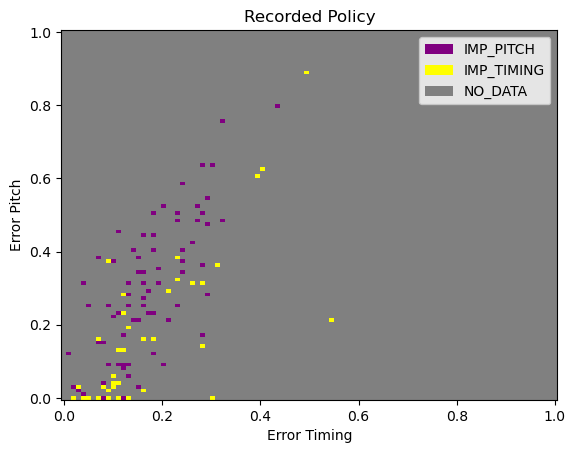

In [98]:

from matplotlib.colors import ListedColormap

def plot_recorded_policy():
    expert_mode = list(whole_data["practice_mode"])
    
    zipped_data = zip(whole_data["error_before_right_pitch"], whole_data["error_before_right_timing"])
    zipped_data = [(round(x, 2), round(y, 2)) for (x, y) in zipped_data]

    density = 100
    best_mode = np.full((density, density), 2)  # Initialize with the color index for "NO_DATA"
    
    for i, error_pitch in enumerate(np.linspace(0, 1, density)):
        for j, error_timing in enumerate(np.linspace(0, 1, density)):
            target_index = [index for index, tpl in enumerate(zipped_data) if tpl[0] == i/density and tpl[1] == j/density]
            
            if target_index:
                best_pm = expert_mode[target_index[0]]
                if best_pm == "IMP_PITCH":
                    best_mode[i][j] = 0  # Color index for "IMP_PITCH"
                elif best_pm == "IMP_TIMING":
                    best_mode[i][j] = 1  # Color index for "IMP_TIMING"
    
    # Define custom colors
    colors = ["purple", "yellow","grey"]
    
    custom_cmap = ListedColormap(colors)
    
    plt.pcolormesh(np.linspace(0, 1, density), np.linspace(0, 1, density), best_mode, cmap=custom_cmap)
    plt.title("Recorded Policy")
    plt.ylabel("Error Pitch")
    plt.xlabel("Error Timing")
    
    custom_lines = [Patch(facecolor="purple"),  # Color for "IMP_PITCH"
                    Patch(facecolor="yellow"),  # Color for "IMP_TIMING"
                    Patch(facecolor="grey")  # Color for "NO_DATA"
                 ]
    
    plt.legend(custom_lines, ["IMP_PITCH", "IMP_TIMING", "NO_DATA"])
    plt.show()

plot_recorded_policy()


In [99]:
def error_diff_to_utility_for_opt(error_pre_pitch, error_post_pitch, error_pre_timing, error_post_timing, a, MEAN_UTILITY):
    #calculate the difference in both errors between the pre and post error
    #calculate the utility of the difference in errors
    diff_timing = error_post_timing - error_pre_timing
    diff_pitch  = error_post_pitch  - error_pre_pitch
    return -diff_timing*a  -diff_pitch*(1-a)  - MEAN_UTILITY

In [100]:
def calc_utility(recorded_points,a,  mean_utility):
    #calc utility for all expert data
    recorded_points["utility"] = recorded_points.apply(lambda row: error_diff_to_utility_for_opt(row["error_before_right_pitch"],
                                                                                row["error_after_right_pitch"],
                                                                                row["error_before_right_timing"],
                                                                                row["error_after_right_timing"],a, mean_utility), axis=1)
    return recorded_points  

In [101]:
def optimal_gp(gauss_models, policy_diff):
    #we choose the gp with the lowest mean policy diff
    best_model_index = np.argmin([np.mean(pd) for pd in policy_diff])
    best_model = gauss_models[best_model_index]
    return best_model



In [102]:
def optimal_gp_index(gauss_models, policy_diff, max_iter):
    #we choose the gp with the lowest mean policy diff
    l = gauss_models[-max_iter-4:]
    p = policy_diff[-max_iter-4:]
    best_model_index = np.argmin([np.mean(pd) for pd in p])
    best_model = l[best_model_index]
    return best_model

In [103]:
gp_list = []
policy_diff_list = []

In [104]:

def objective_function(x, kernel_type):
    #objective function for the optimization of the hyperparameters, getting the mean policy diff for the current hyperparameters
    if x.ndim > 1:
        x = x.flatten()
        
    # x is a list of hyperparameters
    a, mean_utility = x
    print (a, mean_utility)
    # Initialize a GP model with the given hyperparameters and kernel type
    # per calculation of the objective function we calculate the whole prediction of the gaussian process and compare it to the ground truth data. 
    gp = GaussianProcess()
    
    #gp.space.model_dimensionality
    if kernel_type == 'Matern52':
        kernel = GPy.kern.Matern52(input_dim=gp.space.model_dimensionality, ARD=True)
    elif kernel_type == 'RBF':
        kernel = GPy.kern.RBF(input_dim=gp.space.model_dimensionality, ARD=True)
    elif kernel_type == 'RatQuad':
        kernel = GPy.kern.RatQuad(input_dim=gp.space.model_dimensionality, ARD=True)
    elif kernel_type == 'Poly':
        kernel = GPy.kern.Poly(input_dim=gp.space.model_dimensionality, degree=1, variance=1.0, scale=1.0, offset=0.0, ARD=True)
    elif kernel_type == 'Exp':
        kernel = GPy.kern.Exponential(input_dim=gp.space.model_dimensionality, ARD=True)
    else:
        raise ValueError("Invalid kernel type")

    gp.update_model_with_kernel(kernel)

    # Calculate the utility using the expert data and the GP model
    recorded_points =  expert_data [[  #'error_before_left_timing',
     'error_before_right_timing',
       #'error_before_left_pitch', 
       'error_before_right_pitch',
       #'error_after_left_timing', 
        'error_after_right_timing',
       #'error_after_left_pitch', 
       'error_after_right_pitch', "practice_mode", "bpm"]]
    # policy_diff = policy_diff_for_single_gp(gp, recorded_points,a,mean_utility)
    #policy_diff_list.append(-policy_diff)
    #return -policy_diff

    policy_diff=    policy_add_test(gp,recorded_points,a, mean_utility) #policy_diff_for_single_gp(gp, recorded_points,a, mean_utility)
    gp_list.append(gp)
    policy_diff_list.append(policy_diff)
    #plot_best_policy(gp, 70)
    return policy_diff

    


In [105]:
def policy_test(gauss_model, test_points):
    #calculate the policy diff for a single gp, given the recorded points and the expert decision
    policy_diff = []
    practice_mode_map = {'IMP_PITCH': PracticeMode.IMP_PITCH, 'IMP_TIMING': PracticeMode.IMP_TIMING}
    #for all recorded data points
    #recorded_points = calc_utility(test_points, a, mean_utility)
    points =[]
    for i, point in  test_points.iterrows():  # recorded_points.iterrows():


        #point_data = point.drop("utility")
        #expert_opt_policy = point["utility"]
        bpm=point["bpm"]
        given_practice_mode = point["practice_mode"]
        expert_practice_mode = practice_mode_map[given_practice_mode]
        
        if expert_practice_mode == PracticeMode.IMP_PITCH:
            wrong_practice_mode = PracticeMode.IMP_TIMING
        else:
           wrong_practice_mode = PracticeMode.IMP_PITCH
       
        errors = {
       # 'pitch_left': point_data['error_before_left_pitch'],
        'pitch_right': point['error_before_right_pitch'],
       # 'timing_left': point_data['error_before_left_timing'],
        'timing_right': point['error_before_right_timing']}

 
        best_estimated = gauss_model.get_best_practice_mode(errors, bpm)
        points.append ((errors, bpm,  expert_practice_mode, wrong_practice_mode, best_estimated)) 
        
    
    right_utility = 0
    wrong_utility = 0
    for point in points:
        errors, bpm, expert_practice_mode, wrong_practice_mode, best_estimated = point 
        #print ("expert practice mode:", expert_practice_mode,  "best practice mode ", best_estimated)

        if best_estimated == expert_practice_mode:
            right_utility += 1.0
        else:
            wrong_utility += 1.0
    print ("accumulated correct=", right_utility,  "wrong =" ,wrong_utility, "ratio=", right_utility/(right_utility+wrong_utility))
    return wrong_utility/right_utility
        

In [106]:
def policy_add_test(gauss_model, test_points,a,  mean_utility):
    #calculate the policy diff for a single gp, given the recorded points and the expert decision
    # 1) step: add data points to the gauss process 
    policy_diff = []
    practice_mode_map = {'IMP_PITCH': PracticeMode.IMP_PITCH, 'IMP_TIMING': PracticeMode.IMP_TIMING}
    #for all recorded data points
    recorded_points = calc_utility(test_points, a,  mean_utility)
    points =[]
    for i, point in recorded_points.iterrows():


        point_data = point.drop("utility")
        expert_opt_policy = point["utility"]
        bpm=point["bpm"]
        given_practice_mode = point["practice_mode"]
        expert_practice_mode = practice_mode_map[given_practice_mode]
        
        if expert_practice_mode == PracticeMode.IMP_PITCH:
            wrong_practice_mode = PracticeMode.IMP_TIMING
        else:
           wrong_practice_mode = PracticeMode.IMP_PITCH
       
        errors = {
        #'pitch_left': point_data['error_before_left_pitch'],
        'pitch_right': point_data['error_before_right_pitch'],
        #'timing_left': point_data['error_before_left_timing'],
        'timing_right': point_data['error_before_right_timing']}

 
        gauss_model.add_data_point(errors ,bpm, expert_practice_mode, expert_opt_policy)
        
    gauss_model.update_model()
    
    # estimate the quality of prediction

    for i, point in recorded_points.iterrows():


        point_data = point.drop("utility")
        expert_opt_policy = point["utility"]
        bpm=point["bpm"]
        given_practice_mode = point["practice_mode"]
        expert_practice_mode = practice_mode_map[given_practice_mode]
        
        if expert_practice_mode == PracticeMode.IMP_PITCH:
            wrong_practice_mode = PracticeMode.IMP_TIMING
        else:
           wrong_practice_mode = PracticeMode.IMP_PITCH
       
        errors = {
       # 'pitch_left': point_data['error_before_left_pitch'],
        'pitch_right': point_data['error_before_right_pitch'],
       # 'timing_left': point_data['error_before_left_timing'],
        'timing_right': point_data['error_before_right_timing']}

 
        best_estimated = gauss_model.get_best_practice_mode(errors, bpm)
        points.append ((errors, bpm,  expert_practice_mode, wrong_practice_mode, best_estimated)) 
        
    
    right_utility = 0
    wrong_utility = 0
    for point in points:
        errors, bpm, expert_practice_mode, wrong_practice_mode, best_estimated = point 
        #print ("expert practice mode:", expert_practice_mode,  "best practice mode ", best_estimated)
        r= gauss_model.get_estimate(errors,bpm, expert_practice_mode)
        w= gauss_model.get_estimate(errors,bpm, wrong_practice_mode)
        diff = abs (r-w)
        
        if best_estimated == expert_practice_mode:
            right_utility += diff # maximize
            
        else:
            wrong_utility += diff # penalize 
            
    print ("accumulated correct=", right_utility,  "wrong =" ,wrong_utility)
    return (1/right_utility) + 0.1 *wrong_utility
    # the further the correct from the wrong the wrose. 
    #wrong_utility/right_utility

running kernel Matern52
0.9014286128198323 -8.83832775663601
accumulated correct= [7.8853694] wrong = [17.04928169]
0.4639878836228102 7.323522915498703
accumulated correct= [7.66161944] wrong = [19.69213416]
0.1973169683940732 2.0223002348641756
accumulated correct= [3.49376988] wrong = [8.39684225]
-0.687962719115127 4.161451555920909
accumulated correct= [2.84464869] wrong = [7.56310953]
-0.6880109593275947 -9.588310114083951
accumulated correct= [1.62368126] wrong = [4.95282863]
-0.7080452714416934 4.1569138006380735
accumulated correct= [3.19802015] wrong = [8.45717662]
num acquisition: 1, time elapsed: 0.61s
-0.5242488777104217 4.1984435145147305
accumulated correct= [6.83022032] wrong = [13.50513566]
num acquisition: 2, time elapsed: 1.17s
-0.6930168615942822 -9.70370810647723
accumulated correct= [13.98053195] wrong = [17.53721364]
num acquisition: 3, time elapsed: 1.74s
-0.6856979660513602 -9.534968350331555
accumulated correct= [2.42893329] wrong = [5.83050299]
num acquisitio

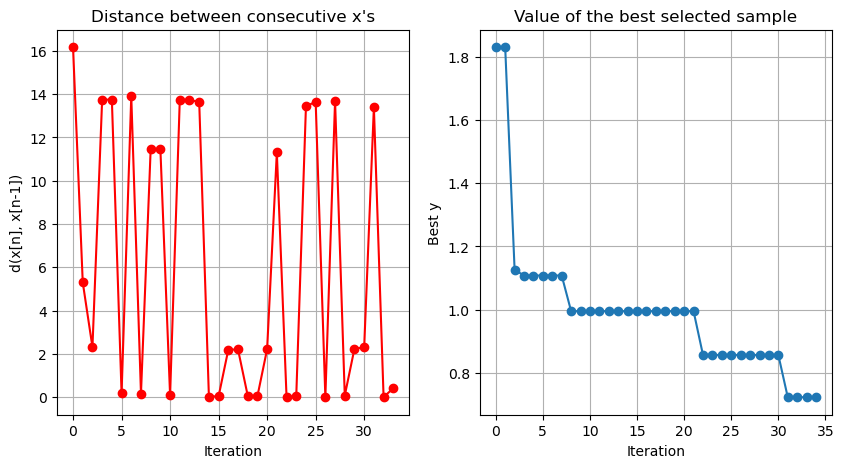

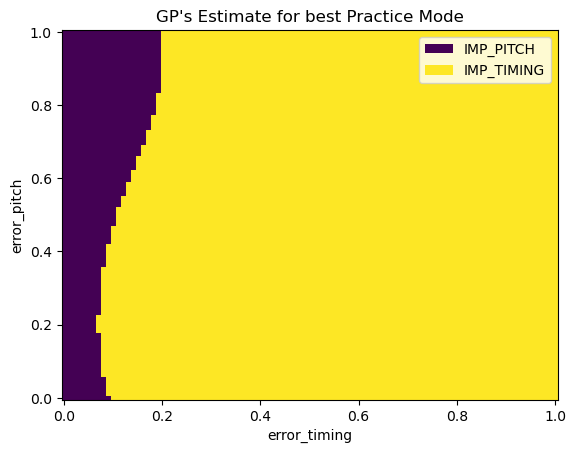

In [107]:



#initialize the hyper parameters bound for different kernels
kernel_types = ['Matern52', 'RatQuad', 'RBF', 'Exp']
bounds = [{'name': 'a', 'type': 'continuous', 'domain': (-1, 1)},       
          {'name': 'mean_utility', 'type': 'continuous', 'domain': (-10,10)}]


best_gp_dict ={}
best_gp_dict_policy = {}
#for each kernel
for kernel_type in kernel_types:
#do baysian optimization
    print ("running kernel", kernel_type)
    
        
    # object function includes the definition of the kernel type, not the kernel object.     
    obj_func = lambda x: objective_function(x, kernel_type)
    
    # set the bounds for the optimization process here! 
    bo = BayesianOptimization(f=obj_func,     
                              domain=bounds,
                              acquisition_type='EI',
                              acquisition_jitter=0.05,
                              num_cores=10)
    
    # iterate over the bounds at least as many times. 
    max_iter_index= 30










    bo.run_optimization(max_iter=max_iter_index, verbosity=True)
   
    
    
    # Get the best set of hyperparameters
    bo.plot_convergence()

       

    best_hyperparameters = bo.x_opt
    best_mean_policy_diff = bo.fx_opt

    gp=optimal_gp_index(gp_list, policy_diff_list, max_iter_index)
    plot_best_policy(gp, 70)
    plot_best_policy(gp,75)
    policy_test(gp,expert_data)

    print ("best hyperparams", bo.x_opt)
    print ("best policy diff", bo.fx_opt)
    
    
    best_gp_dict[kernel_type] = best_hyperparameters
    best_gp_dict_policy[kernel_type] = best_mean_policy_diff
    # code that visualizes non-zero part of the input space and the predictions of the best GP model for the best set of hyperparameters
    
   

In [ ]:
best_gp_dict
# best_gp_dict_policy

{'Matern52': array([-0.68649834,  4.14014912]),
 'RatQuad': array([-1.        , -8.49061352]),
 'RBF': array([-1.        , -1.75250916]),
 'Exp': array([-0.29962734, -0.80427282])}

In [ ]:
best_gp_dict_policy

{'Matern52': 0.7219007772865427,
 'RatQuad': 0.4898685841629384,
 'RBF': 0.5710660956510961,
 'Exp': 1.209217238799677}

In [ ]:
best_kernel_type = min(best_gp_dict_policy, key=best_gp_dict_policy.get) 
best_param = best_gp_dict[best_kernel_type]
#get a dict of the parameters for the best kernel with its name as the key, and also the best mean policy diff and the kernel type
best_param_dict = dict(zip([b['name'] for b in bounds], best_param))
best_kernel = {"name": best_kernel_type, "best parameters": best_param_dict, "policy-diff": best_gp_dict_policy[best_kernel_type]}



In [ ]:
best_kernel

{'name': 'RatQuad',
 'best parameters': {'a': -1.0, 'mean_utility': -8.490613519687443},
 'policy-diff': 0.4898685841629384}

In [ ]:
gp= optimal_gp(gp_list,policy_diff_list)
gp.kernel

RatQuad.,value,constraints,priors
variance,0.7845653802007926,+ve,
lengthscale,"(7,)",+ve,
power,1.5156120852490933,+ve,


In [ ]:
gp.kernel.lengthscale

index,GP_regression.RatQuad.lengthscale,constraints,priors
[0],0.99872207,+ve,
[1],0.98479388,+ve,
[2],0.77874510,+ve,
[3],1.06509537,+ve,
[4],0.60851373,+ve,
[5],1.60818701,+ve,
[6],1.99216179,+ve,


In [ ]:
#calculate optimal model given a list of models and a list of losses


#plot_best_policy(gp, 60)
#plot_best_policy(gp, 70)
#plot_best_policy(gp, 80)
#plot_best_policy(gp, 90)
#plot_best_policy(gp, 100)
#plot_best_policy(gp, 50)
# compare gp policy with expert policy

policy_test(gp,expert_data)
#policy_test(gp,test_data, best_hyperparameters[0], best_hyperparameters[1])




accumulated correct= 76.0 wrong = 45.0 ratio= 0.628099173553719


0.5921052631578947

In [ ]:
data = combined_df

In [ ]:
gp.data_Y


array([[8.79860037],
       [7.85119473],
       [8.3798064 ],
       [8.71518235],
       [8.75699251],
       [8.74133626],
       [8.32584976],
       [8.62641762],
       [8.89977818],
       [8.06098857],
       [8.67257104],
       [8.18258549],
       [8.62862691],
       [8.32378261],
       [8.04994995],
       [9.76661451],
       [8.31629306],
       [8.55010227],
       [8.14199099],
       [8.61628019],
       [8.77937154],
       [8.4465678 ],
       [8.52786196],
       [8.24061352],
       [8.33297122],
       [8.69455747],
       [8.62591625],
       [7.99256834],
       [8.73037561],
       [8.9052753 ],
       [8.50061819],
       [8.41815629],
       [8.31337665],
       [8.45691708],
       [8.70302631],
       [8.57662962],
       [8.73768403],
       [8.42765631],
       [8.2522889 ],
       [9.16883234],
       [8.84995059],
       [8.97556208],
       [8.55810621],
       [8.48323034],
       [8.77925765],
       [8.92092243],
       [8.92917654],
       [8.267

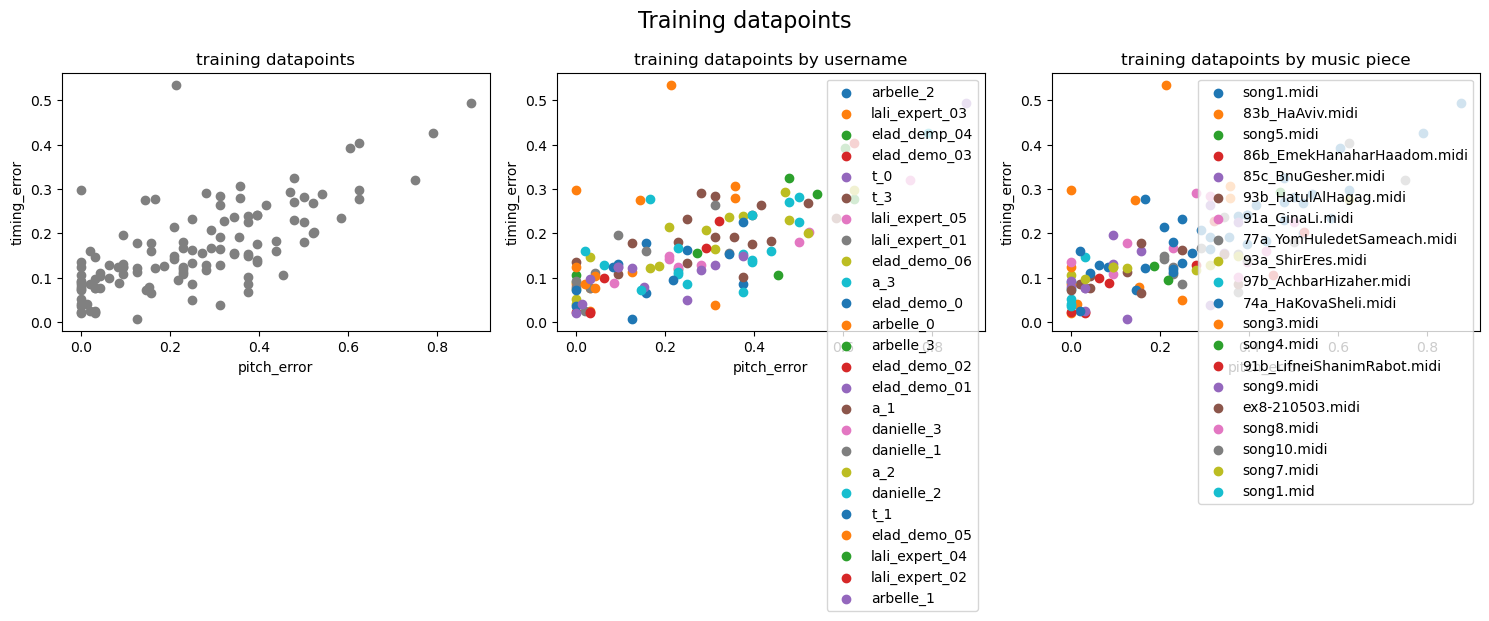

In [ ]:



users = list(set(data["username"]))
midi_name = list(set(data["midi_filename"]))

figure, axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].scatter(data['error_before_right_pitch'], data['error_before_right_timing'], label=None, c='gray')
axis[0].set_title('training datapoints')
axis[0].set_xlabel('pitch_error')
axis[0].set_ylabel('timing_error')

for index, u in enumerate(users):
    axis[1].scatter(data.loc[data["username"] == u]['error_before_right_pitch'],
                    data.loc[data["username"] == u]['error_before_right_timing'], label=u)
axis[1].set_title('training datapoints by username')
axis[1].set_xlabel('pitch_error')
axis[1].set_ylabel('timing_error')
axis[1].legend()

for i, m in enumerate(midi_name):
    axis[2].scatter(data.loc[data["midi_filename"] == m]['error_before_right_pitch'],
                    data.loc[data["midi_filename"] == m]['error_before_right_timing'], label=m)
axis[2].set_title('training datapoints by music piece')
axis[2].set_xlabel('pitch_error')
axis[2].set_ylabel('timing_error')
axis[2].legend()
figure.suptitle("Training datapoints", fontsize=16)
plt.tight_layout()
plt.show()



In [ ]:
gp.data_Y

array([[8.79860037],
       [7.85119473],
       [8.3798064 ],
       [8.71518235],
       [8.75699251],
       [8.74133626],
       [8.32584976],
       [8.62641762],
       [8.89977818],
       [8.06098857],
       [8.67257104],
       [8.18258549],
       [8.62862691],
       [8.32378261],
       [8.04994995],
       [9.76661451],
       [8.31629306],
       [8.55010227],
       [8.14199099],
       [8.61628019],
       [8.77937154],
       [8.4465678 ],
       [8.52786196],
       [8.24061352],
       [8.33297122],
       [8.69455747],
       [8.62591625],
       [7.99256834],
       [8.73037561],
       [8.9052753 ],
       [8.50061819],
       [8.41815629],
       [8.31337665],
       [8.45691708],
       [8.70302631],
       [8.57662962],
       [8.73768403],
       [8.42765631],
       [8.2522889 ],
       [9.16883234],
       [8.84995059],
       [8.97556208],
       [8.55810621],
       [8.48323034],
       [8.77925765],
       [8.92092243],
       [8.92917654],
       [8.267

In [ ]:
gp.kernel
gp.kernel.lengthscale


index,GP_regression.RatQuad.lengthscale,constraints,priors
[0],0.99872207,+ve,
[1],0.98479388,+ve,
[2],0.77874510,+ve,
[3],1.06509537,+ve,
[4],0.60851373,+ve,
[5],1.60818701,+ve,
[6],1.99216179,+ve,


In [ ]:
bo.x_opt
#output the kernel parameters of the gaussian process model
a = bo.x_opt[-2]
a




-0.29962733738172154

In [ ]:
def error_diff_to_utility(error_pre, error_post,a, mean_utility):
    diff_timing = (error_pre["timing_left"] + error_pre["timing_right"]) - (
            error_post["timing_left"] + error_post["timing_right"])
    diff_pitch = (error_pre["pitch_left"] + error_pre["pitch_right"]) - (
            error_post["pitch_left"] + error_post["pitch_right"])

    return (a* diff_timing +  (1-a) *diff_pitch) - mean_utility

In [ ]:
data

,midi_filename,username,practice_mode,bpm,error_before_left_timing,error_before_right_timing,error_before_left_pitch,error_before_right_pitch,error_after_left_timing,error_after_right_timing,error_after_left_pitch,error_after_right_pitch
0,song1.midi,t_0,IMP_TIMING,85.0,0.0,0.494491,0.0,0.875000,0.0,0.036098,0.0,0.000000
1,song4.midi,t_1,IMP_PITCH,85.0,0.0,0.095176,0.0,0.218750,0.0,0.036254,0.0,0.000000
2,song9.midi,t_1,IMP_TIMING,85.0,0.0,0.226084,0.0,0.375000,0.0,0.005800,0.0,0.125000
3,song9.midi,t_1,IMP_PITCH,85.0,0.0,0.005800,0.0,0.125000,0.0,0.131552,0.0,0.093750
4,song9.midi,t_1,IMP_PITCH,85.0,0.0,0.131552,0.0,0.093750,0.0,0.064388,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
16,77a_YomHuledetSameach.midi,danielle_3,IMP_PITCH,72.0,0.0,0.320511,0.0,0.750000,0.0,0.179849,0.0,0.500000
17,77a_YomHuledetSameach.midi,danielle_3,IMP_PITCH,72.0,0.0,0.179849,0.0,0.500000,0.0,0.123130,0.0,0.229167
18,77a_YomHuledetSameach.midi,danielle_3,IMP_PITCH,72.0,0.0,0.123130,0.0,0.229167,0.0,0.148956,0.0,0.208333
19,77a_YomHuledetSameach.midi,danielle_3,IMP_PITCH,72.0,0.0,0.148956,0.0,0.208333,0.0,0.141573,0.0,0.208333


In [ ]:
# from tqdm import tqdm


# for index, d in tqdm(data.iterrows()):
#     error = {'error_pre': {'timing_left': d['error_before_left_timing'],
#                            'timing_right': d['error_before_right_timing'],
#                            'pitch_left': d['error_before_left_pitch'],
#                            'pitch_right': d['error_before_right_pitch']},
#              'error_post': {'timing_left': d['error_after_left_timing'],
#                             'timing_right': d['error_after_right_timing'],
#                             'pitch_left': d['error_after_left_pitch'],
#                             'pitch_right': d['error_after_right_pitch']}}
#     # calculate utility from error_pre and error_post
#     utility = error_diff_to_utility(error['error_pre'], error['error_post'], bo.x_opt[-2], bo.x_opt[-1])
    
#     practice_mode = None
#     if d['practice_mode'] == 'IMP_TIMING':
#         practice_mode = PracticeMode.IMP_TIMING
#     elif d['practice_mode'] == 'IMP_PITCH':
#         practice_mode = PracticeMode.IMP_PITCH

#     # add data-point to GP
#     gp.add_data_point(error['error_pre'], d['bpm'], practice_mode, utility)
#     gp.update_model()


In [ ]:
#training_points

In [ ]:
#gp.plot_utility(utility_function=gp.utility_gp(bpm=60, practice_mode=PracticeMode.IMP_TIMING),
#                 title="Utility: Gaussian Process for IMP_TIMING", density=30, data_points=training_points[1])

In [ ]:


#gp.plot_utility(utility_function=gp.utility_gp(bpm=60, practice_mode=PracticeMode.IMP_PITCH),
 #                 title="Utility: Gaussian Process for IMP_PITCH", density=30, data_points=training_points[0])

